In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets  # for dummy data

### Creating dummy data

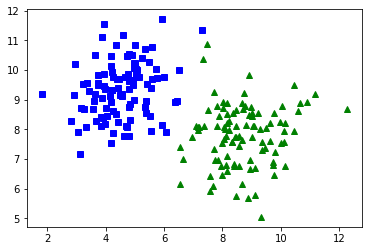

In [2]:
x, y = datasets.make_blobs(n_samples=200, centers=2, n_features=2, center_box=(0, 10))
plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], 'g^')
plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], 'bs')
plt.show()

In [3]:
np.unique(y)

array([0, 1])

**converting taget to -1, 1**

In [54]:
y[y==0] = -1
np.unique(y)

array([-1,  1])

### Funtion to plot the classification and Decision Boundary

In [55]:
def show(w, w0, x, y):
    slope = -w[0]/w[1]    # -a/b
    intercept = -w0/w[1]  # -c/b
    hplane_x = np.arange(10)
    hplane_y = slope*hplane_x + intercept
    plt.plot(hplane_x, hplane_y)                        # show h-plane
    plt.plot(x[:, 0][y == -1], x[:, 1][y == -1], 'bs')  # show classes
    plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], 'g^')
    plt.show()

### Algo with single (first) point

In [56]:
def algorithm(x, y, w, w0):
    for iteration in range(5000):  # many iterations
        miss_cls = 0
        for point in range(len(x)): # for each point
            hs = np.sign(np.dot(w, x[point]) + w0) # half space
            if hs != np.sign(y[point]):
                miss_cls += 1
                w += x[point]*np.sign(y[point])  # update equations
                w0 += np.sign(y[point])
                break # break after first point

        if miss_cls==0:
            show(w, w0, x, y)
            print('N_iter', iteration, '| 98% accuracy!!. Good DB is achieved')
            break        
        
        if iteration % 500 == 0:
            show(w, w0, x, y)
            print('N_iter', iteration, '| Accuracy:', 1 - round(miss_cls / len(x), 2))
    return w, w0

### Algo with averages of all points

In [57]:
def algorithm(x, y, w, w0):
    for iteration in range(5000):
        miss_cls = 0
        sum_miss_cls_vect = 0
        sum_bias = 0
        for point in range(len(x)):
            hs = np.sign(np.dot(w, x[point]) + w0) # half space
            if hs != np.sign(y[point]):
                miss_cls += 1
                sum_miss_cls_vect += x[point]*np.sign(y[point])
                sum_bias += np.sign(y[point])

        if ((miss_cls / len(x)) < 0.02):
            show(w, w0, x, y)
            print('N_iter', iteration, '| 98% accuracy!!. Good DB is achieved')
            break
        
        w = w + sum_miss_cls_vect / miss_cls
        w0 = w0 + sum_bias / miss_cls
        
        
        if iteration % 500 == 0:
            show(w, w0, x, y)
            print('N_iter', iteration, '| Accuracy:', 1 - round(miss_cls / len(x), 2))
    return w, w0

### Intial Condtions

In [58]:
w = np.random.normal(size=(2,))
w0 = np.random.normal()
w, w0

(array([-0.80005873,  0.75084836]), -0.4555292548037336)

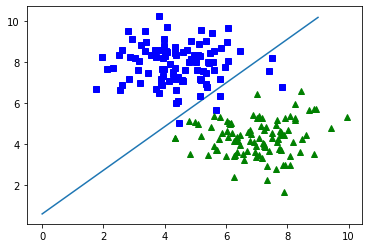

In [59]:
show(w, w0, x, y)

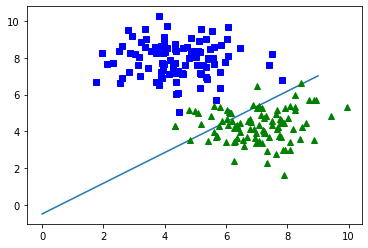

N_iter 0 | Accuracy: 0.030000000000000027


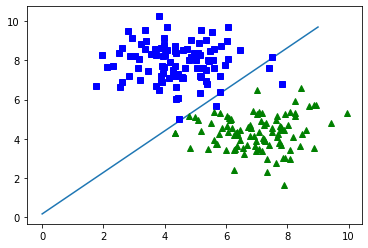

N_iter 58 | 98% accuracy!!. Good DB is achieved


(array([ 29.05948887, -27.43768906]), 4.670636675485908)

In [60]:
algorithm(x, y, w, w0)